# Machine Learning 2024-2025 - UMONS

# Linear Models

**In this lab about linear regression, we will be working with the library [statsmodels](https://www.statsmodels.org/stable/index.html), which provides numerous classes and functions for the estimation of statistical models.**

**The dataset that we will be considering is [Diamonds](https://www.kaggle.com/datasets/shivam2503/diamonds), which contains several characteristics of a series of diamonds, such as their dimensions, the quality of their cuts, their prices, etc. The goal of the lab will be to define linear regression models to best estimate diamond prices using a bunch of predictor variables, and to understand the meaning of the obtained coefficients.**

**Dataset's column information:**

- `price`: price in US dollars.
- `carat`: weight of the diamond. 
- `cut`: quality of the cut (Fair, Good, Very Good, Premium, Ideal).
- `color`: diamond's color, from J (worst) to D (best).
- `clarity`: how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- `x`: length in mm.
- `y`: width in mm. 
- `z`: height in mm.
- `table`: width of top of the diamond relative to its widest point. 
- `depth` = $\frac{2z}{x+y}$.

**Import the necessary libraries.**

In [ ]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from patsy import dmatrices
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn import datasets

np.random.seed(0)

**We load the 'Diamond' dataset as a Dataframe. We also add two columns with noise in order to experiment with variable selection.**

In [2]:
df = pd.read_csv('data/diamonds.csv', index_col=0)
# before transforming
print(f"before adding shape = {df.shape} ")
# Add a column with noise
df['noise'] = np.random.normal(0, 1, len(df))
df['x_noise'] = df['x'] + np.random.normal(0, 1, len(df))
df


before adding shape = (53940, 10) 


,carat,cut,color,clarity,depth,table,price,x,y,z,noise,x_noise
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1.764052,3.377741
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0.400157,4.255212
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.978738,4.622879
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2.240893,4.340102
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1.867558,4.223531
...,...,...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,1.097218,5.377100
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,-0.256572,5.119215
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,-0.434812,5.338206
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,0.094744,6.560655


In [3]:
print(df.size)
print(df.shape)

647280
(53940, 12)


**1) Check the number of observations, the number of columns, the column types, and the number of missing values per columns.**

In [7]:
sep = "-"*100
print(f"number of observation = {len(df)}")
print(sep)
print(f"number of columns = {len(df.columns)}")
print(sep)
print(f" columns types are : \n{df.dtypes}")
print(sep)
print(f"Missing values par columns : \n{df.isnull().sum()}")


number of observation = 53940
----------------------------------------------------------------------------------------------------
number of columns = 12
----------------------------------------------------------------------------------------------------
 columns types are : 
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
noise      float64
x_noise    float64
dtype: object
----------------------------------------------------------------------------------------------------
Missing values par columns : 
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
noise      0
x_noise    0
dtype: int64


## Data cleaning

**2) Set the data type of the categorical variables to 'category'.**

In [9]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
noise       float64
x_noise     float64
dtype: object

**3) Make a scatter plot of the variable `price` along the $y$-axis and the variable `x` along the $x$-axis. Do the same for the variables `y` and `z`.**

**Do you notice anything special?**

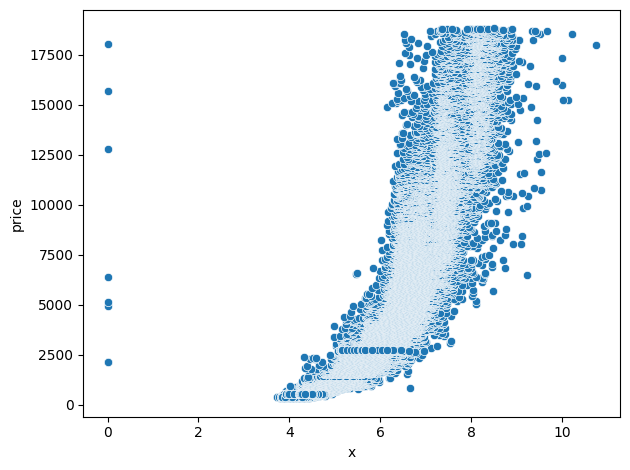

In [ ]:
plt.clf()
sns.scatterplot(x='x', y='price', data=df)
plt.title('price vs x')
plt.tight_layout()
plt.show()

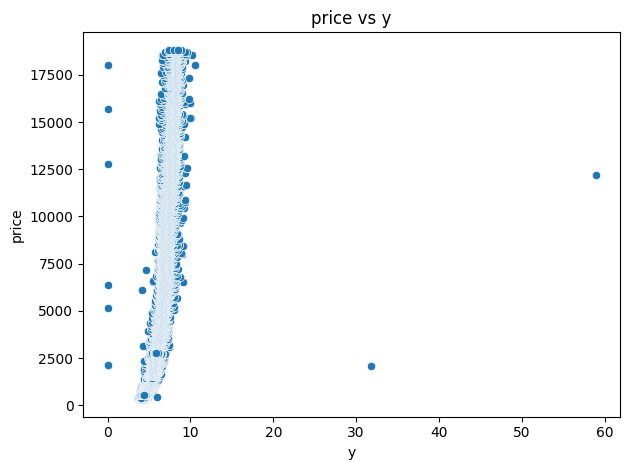

In [29]:
sns.scatterplot(x='y', y='price', data=df)
plt.title('price vs y')
plt.tight_layout()
plt.show()

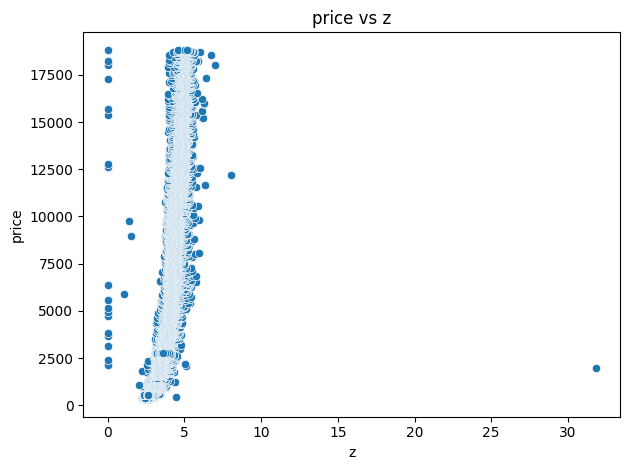

In [30]:
sns.scatterplot(x='z', y='price', data=df,label = '')
plt.title('price vs z')
plt.tight_layout()
plt.show()

**4) Following your observations from the previous question, what would you do?**

## Linear regression using `statsmodels`

**5) Using the [`dmatrices`](https://patsy.readthedocs.io/en/latest/API-reference.html#patsy.dmatrices) function of the `patsy` library and the [`OLS`](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html) class of the `statsmodels` library, fit a linear regression model to the diamonds' price using the variable `x` as your predictor. Then, based on the results given by the [`summary`](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.summary.html) method:** 

- **5.1) Report the coefficient of determination and the adjusted coefficient of determination of the model.**
- **5.2) How would you write the linear regression model?**
- **5.3) Are the fitted coefficients statistically significant at the 5% significance level?**
- **5.4) How would you obtain the confidence intervals?**
- **5.5) How do you interpret the model?**

**6) Compute the linear regression coefficients and intercept using the formula $\hat{\beta} = (X^T X)^{-1} X^T y$. Check that the obtained coeffients are the same than in the previous exercise.**

**7) Fit the diamonds' price to the variable `cut`. Note that `cut` is a categorical variable, which we learned to preprocess in previous labs. When calling `dmatrices`, categorical variables will automatically be converted into dummy variables. You can also use the syntax [`C(variable)`](https://patsy.readthedocs.io/en/latest/categorical-coding.html) for more flexibility.**
- **7.1) Does the model appear to be a better fit than with the variable `x`?**
- **7.2) How would you write the linear regression model now?**
- **7.3) Are all coefficients statistically significant at the $5$% significance level?**
- **7.4) How do you interpret the model? Does the intercept have a meaning?**
- **7.5) Using `sns.boxenplot`, compare the distributions of the variable `price` for the different values of `cut`. Is it consistent with the model results?**  

7.5) We observe some difference between the different distributions. Notably, premium diamonds tend to be the most expensive. However, the differences are not significant enough to predict the price based on the cut accurately, which might explain why `cut` is a poor predictor.

**8) Fit a linear regression model to the variable `price` using `x` and `cut` as predictors. Based on [patsy's formulas](https://patsy.readthedocs.io/en/latest/formulas.html), add an interaction term between `x` and `cut`.**
- **8.1) How does the model write now?**
- **8.2) How do you interpret the model for a 'Good' cut diamond?**
- **8.3) Are all coefficients statistically significant? If not, what does it mean?**

**9) Fit a linear regression model to the variable 'price' using all predictors.**
- **9.1) Derive the value of the Bayesian Information Criterion (BIC) and check that it corresponds to the value reported by the model's summary.**  
- **9.2) Does the model appear to be a better fit than the ones using only `x` and `cut` as predictors? Which criterion would you look at?**
  

**10) The function `forward_selection` below implements a forward stepwise selection of predictors for linear regression. Make sure to understand each of its steps, and how they relate to the algorithm seen in class.**

**Using this function, find the best subset of predictors using the BIC as selection critierion. Redo the same by using the AIC and $R^2$ as selection criterion. Do you notice any differences?**

In [ ]:
def forward_selection(df, target, criterion='BIC'):
    assert criterion in ['BIC', 'AIC', 'R2'], 'Unknown criterion !'
    # Iteratively, select the best feature to add to the model
    candidates = set(df.columns) - {target}
    ordered_predictors = []
    while len(candidates) > 0:
        rsquared_dict = {}
        for predictor in candidates:
            res = fit(df, ordered_predictors + [predictor], target)
            rsquared_dict[predictor] = res.rsquared
        best_predictor = max(rsquared_dict, key=rsquared_dict.get)
        ordered_predictors = ordered_predictors + [best_predictor]
        candidates.remove(best_predictor)
    print(f'Best to worst predictors: {ordered_predictors}')
    # Compute the scores obtained by adding each feature
    current_features = []
    scores = []
    for feature in ordered_predictors:
        current_features += [feature]
        res = fit(df, current_features, target)
        if criterion == 'BIC':
            scores.append(res.bic)
        elif criterion == 'AIC':
            scores.append(res.aic)
        elif criterion == 'R2':
            scores.append(res.rsquared)
    # Select the features that optimize the criterion
    if criterion in ['BIC', 'AIC']:
        num_final_features_to_keep = np.argmin(scores)
    else:
        num_final_features_to_keep = np.argmax(scores)
    final_features_to_keep = ordered_predictors[:num_final_features_to_keep + 1]
    best_final_score = scores[num_final_features_to_keep]
    return final_features_to_keep, best_final_score

def fit(df, features_to_try, target):
    formula = get_formula(features_to_try, target)
    y, X = dmatrices(formula, data=df, return_type='dataframe')
    mod = sm.OLS(y, X)
    res = mod.fit()
    return res

def get_formula(features_to_try, target):
    return target + ' ~ ' + ' + '.join(features_to_try)